In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.formats.info import DataFrameInfo
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.datasets import fetch_california_housing
data, target = fetch_california_housing(as_frame= True, return_X_y=True)

In [48]:
df = data.copy()

In [49]:
df['MedHouseVal'] = target

In [50]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


MedInc:        median income in block group

HouseAge:     median house age in block group

AveRooms:     average number of rooms per household

AveBedrms:    average number of bedrooms per household

Population:    block group population

AveOccup:      average number of household members

Latitude:      block group latitude

Longitude:     block group longitude

The target variable is the median house value for California districts

In [51]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [52]:
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

## In Data analysis we will analyze to find the below stuff

1. Missing Values
2. All the numerical Features
3. Relation between Numrical Features Vs Target
4. Distribution of the numerical variables
5. Check relation between Features
4. Outliers
5. Relationship between independent and dependent features
6. Correlations
7. Feature Engineering
8. Feature selection

##Missing Values

In [53]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

##All the numerical variables

In [54]:
#numerical_features contains the names of all the numerical features (i.e., columns with numeric data types) in the first 8 columns of the DataFrame.
numerical_features=[feature for feature in df.columns[:8] if df[feature].dtypes!='O']
numerical_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [55]:
# Continuous_feature contains the names of all the continuous numerical features in the DataFrame that have more than 25 unique values
Continuous_feature=[feature for feature in numerical_features if len(df[feature].unique())>25]
#The length of this list indicates how many continuous numerical features there are.
print(len(Continuous_feature))

8


##Relation between Numrical Features Vs Target

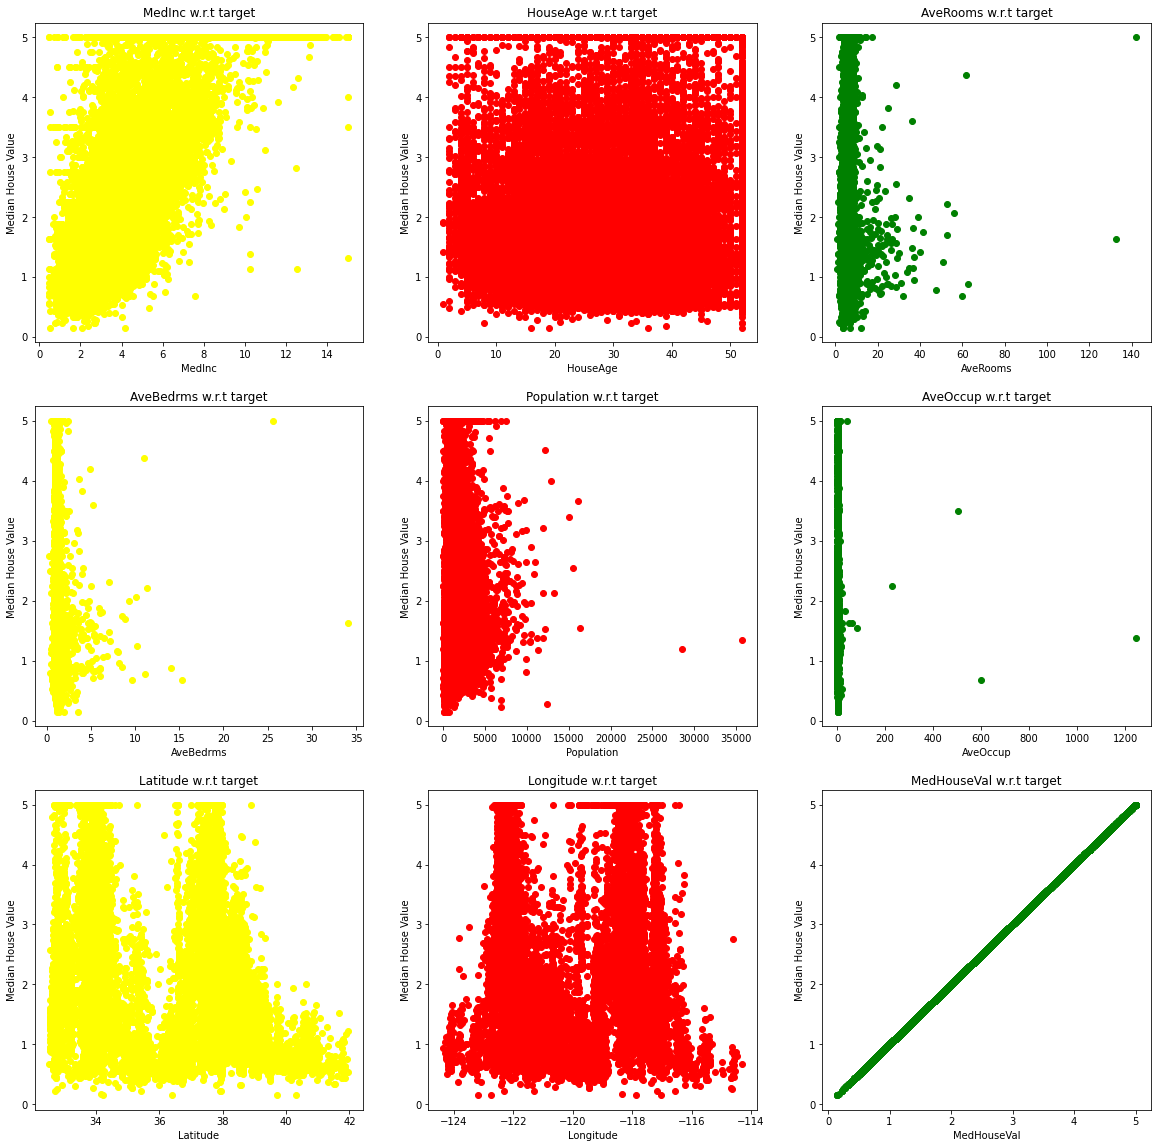

In [56]:
features = []
for i in df:
  features.append(i)
colors = ['#E94B3C','#2D2926']
colors1 =['Yellow','Red','Green','Yellow','Red','Green','Yellow','Red','Green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,20))
for i in range(len(features)):
    plt.subplot(3,3,i+1)
    plt.scatter(df[features[i]],df["MedHouseVal"],color = colors1[i])
    plt.xlabel(features[i])
    plt.ylabel("Median House Value")
    title = features[i] + ' w.r.t target'
    plt.title(title)
plt.show()
# visually inspecting the relationship between each feature and the target variable.
#This can be helpful for selecting features to include in a model or identifying potential outliers.

##Distribution of the numerical Features And Target Variable

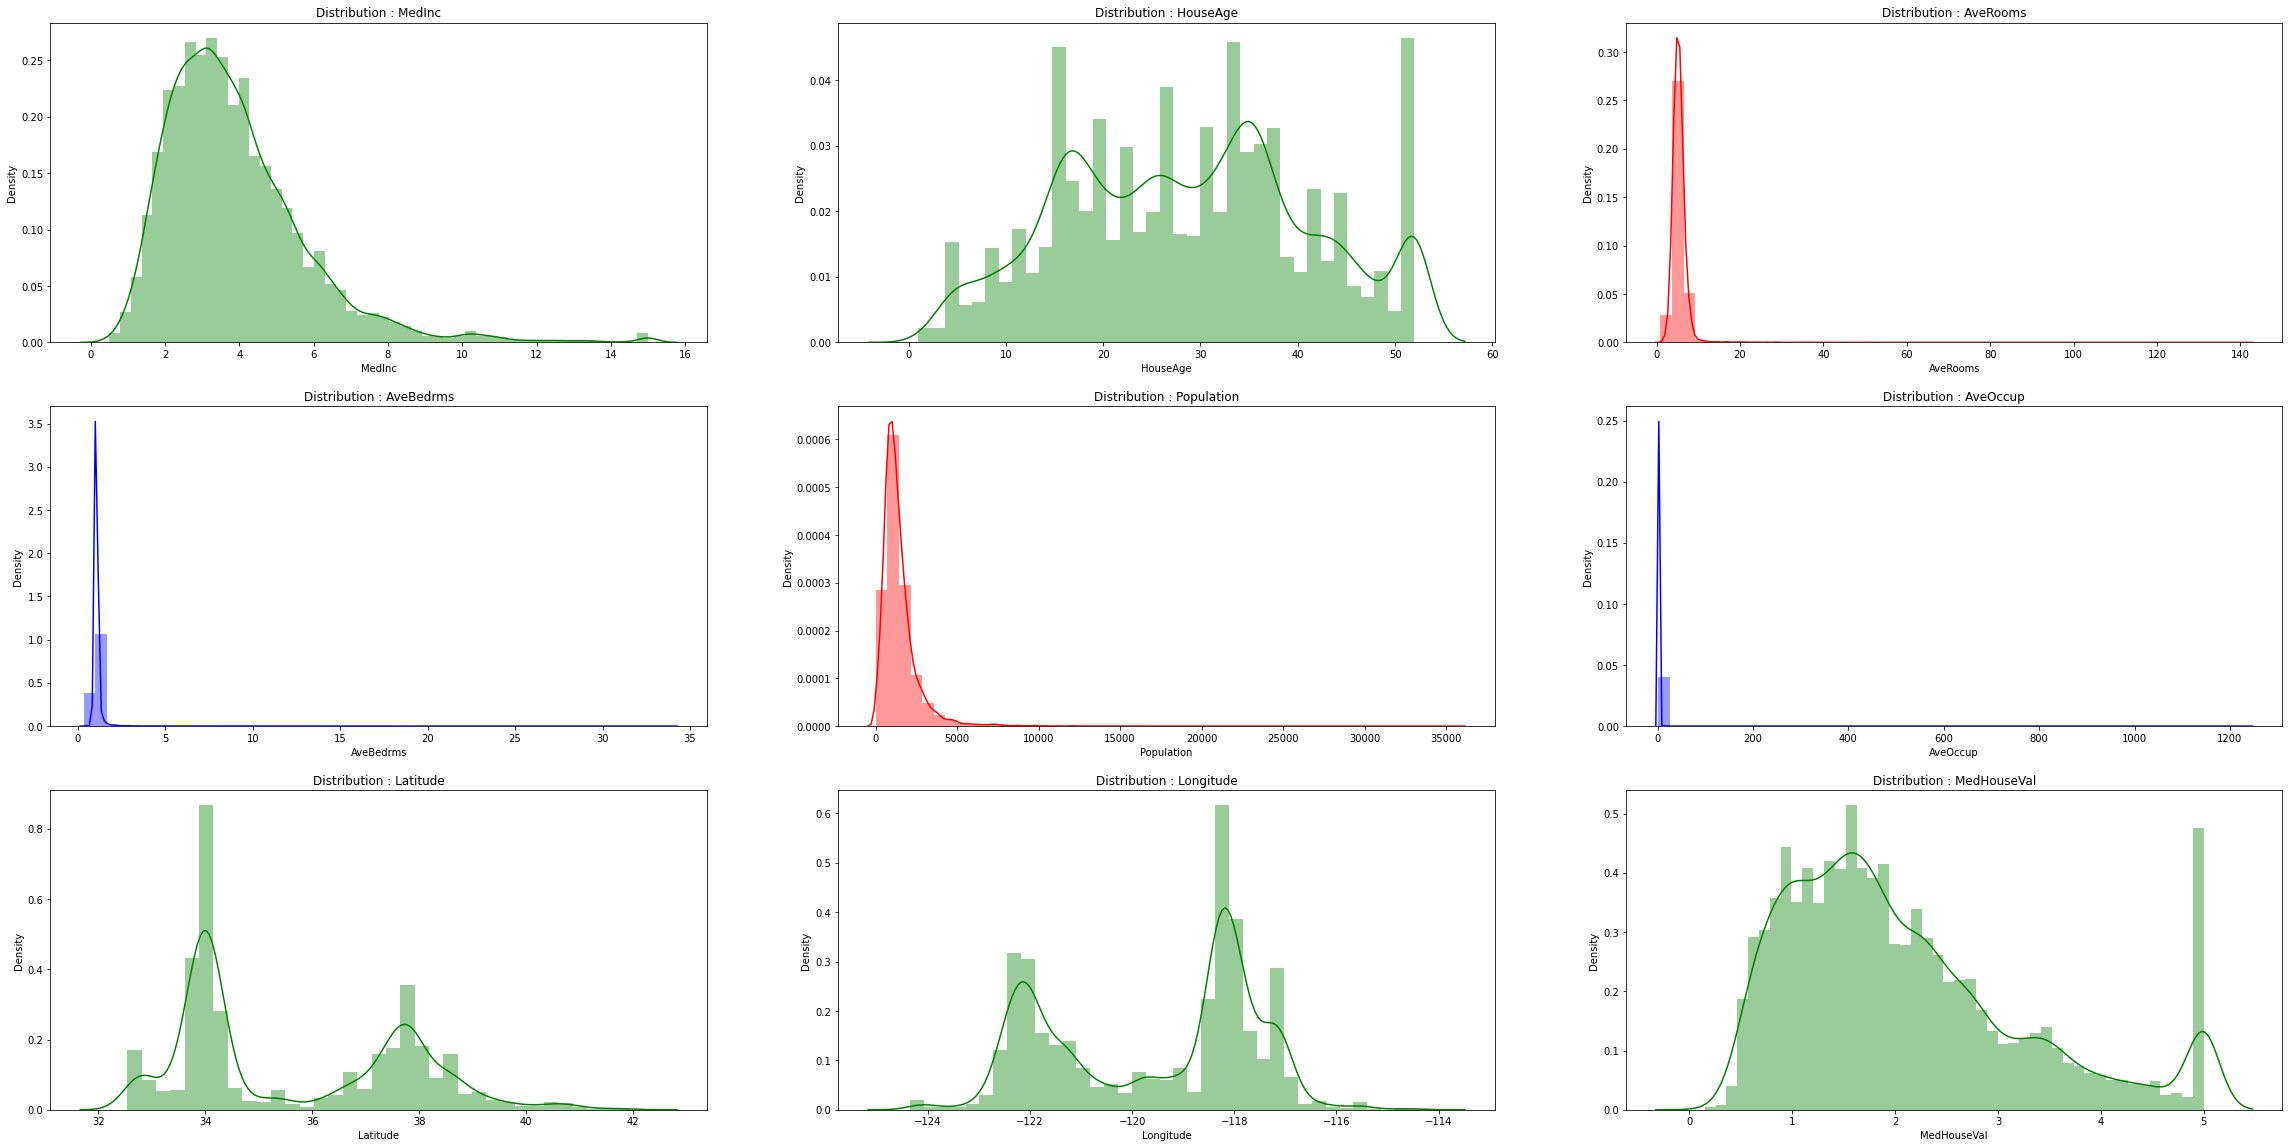

In [57]:
colors = ['Green','Green','Red','Blue','Red','Blue','Green','Green','Green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (40,20))
for i in range(len(features)):
    plt.subplot(3,3,i+1)
    sns.distplot(df11[features[i]],color = colors[i])
    title = 'Distribution : ' + features[i]
    plt.title(title)
plt.show()
 #visualizing the distribution of the continuous features in the dataset.

##Observation:
####Medinc: 
It is clearly seen that median income is in the form of Gaussian normal distribution(however slightly right skewed).
####House age:
House age is normally distributed.
####Avg Rooms and Population: 
These three features are in the form of log normal distribution(right skewed)
#### Ave Occup and Avg Bedrooms:
We can clearly see that these two graph contain heavy tail with high exponantial rise and fall. these are power law distribution.





##Check relation between Features

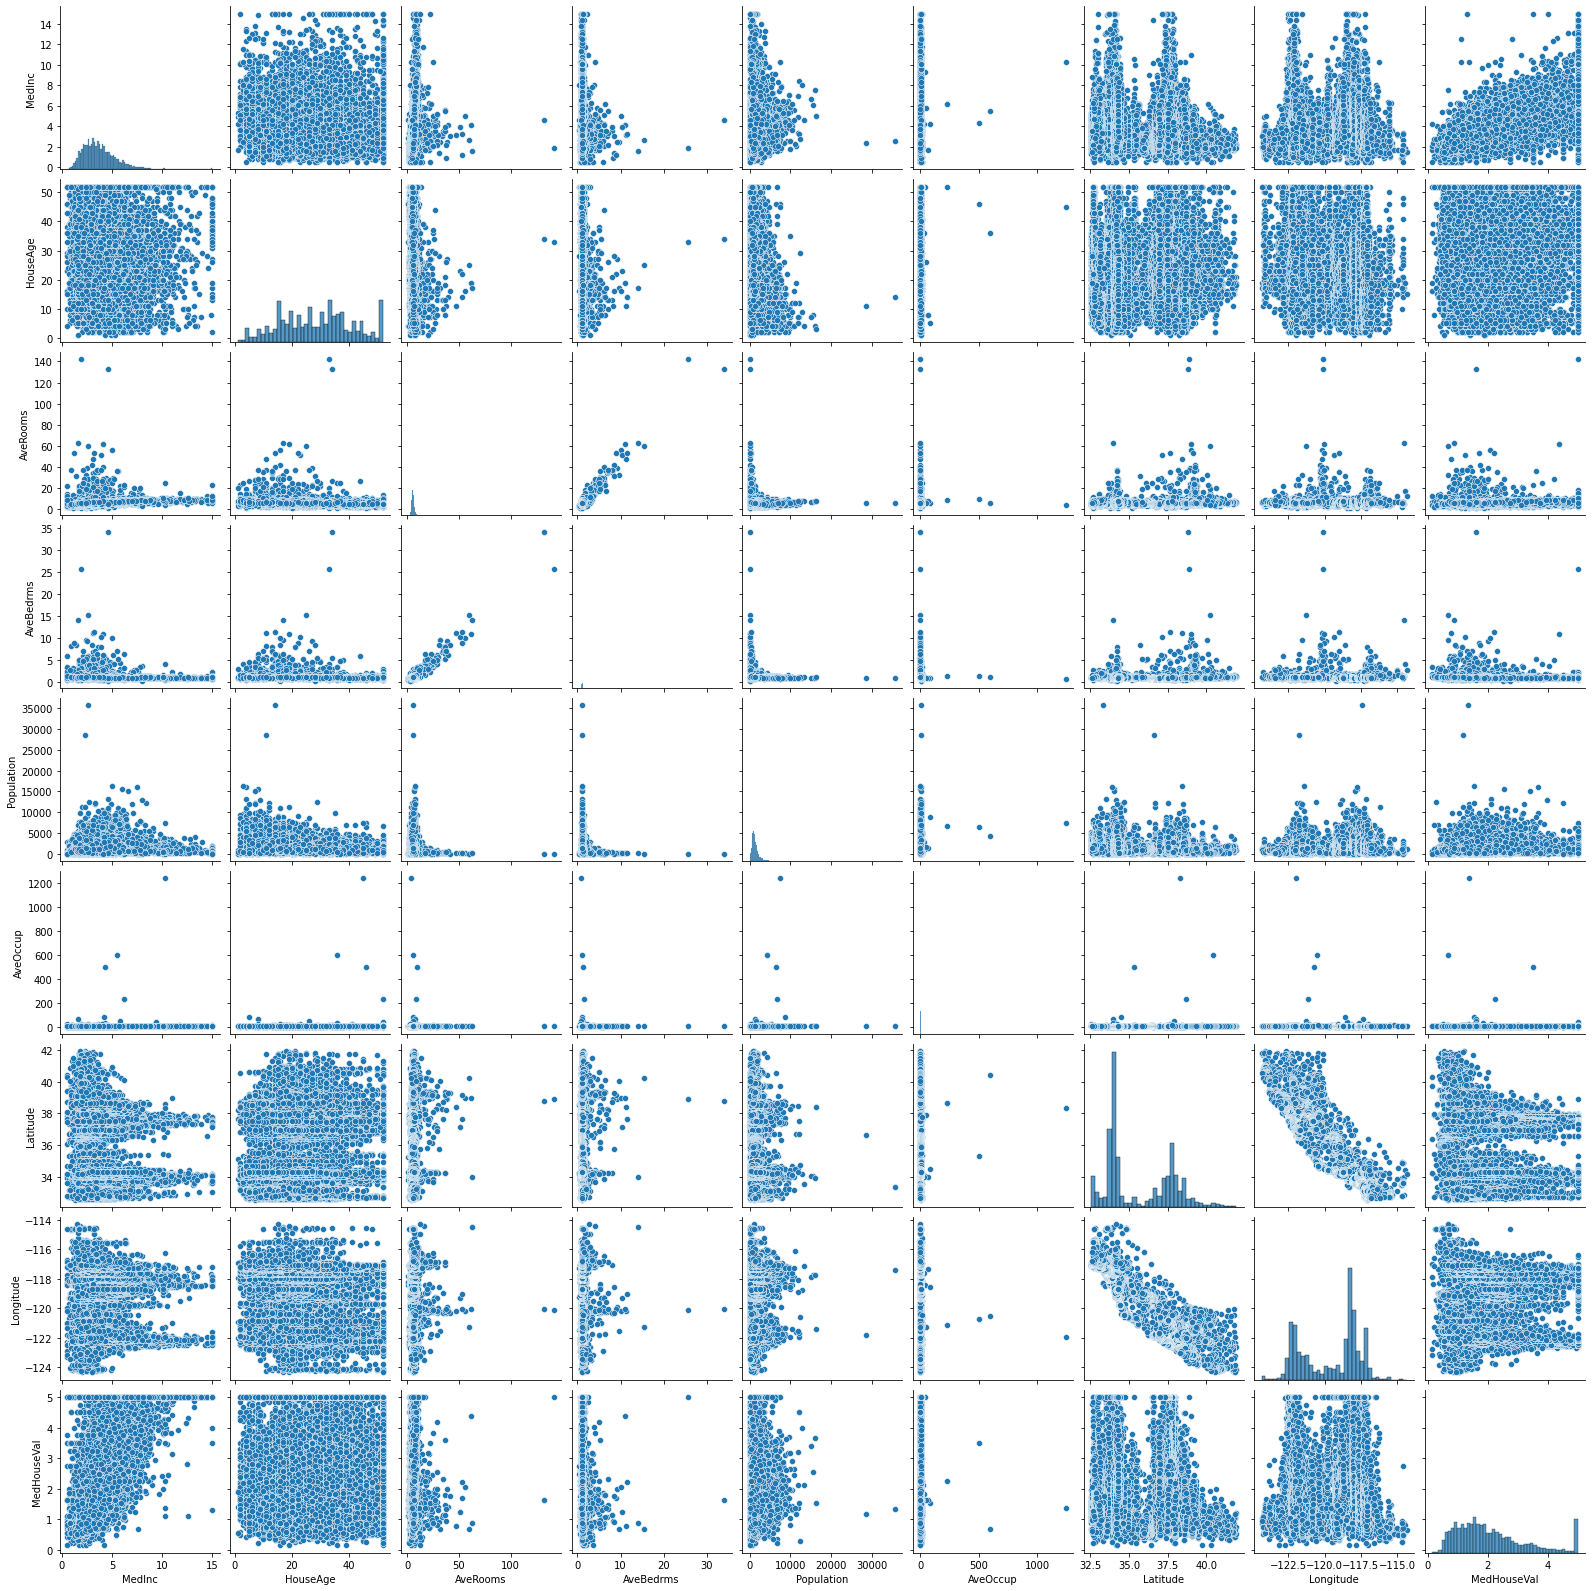

In [58]:
sns.pairplot(df)
#visualize the pairwise relationships between the features in the dataset.

###Observation:
1. We can see Multicolinearity between feature AveRooms and AveBedRms.
2. Also Too many outliers in features.

#Outlier

In [59]:
df12 = df.copy()

MedInc has 345 
HouseAge has 0 
AveRooms has 133 
AveBedrms has 145 
Population has 342 
AveOccup has 8 
Latitude has 0 
Longitude has 0 
MedHouseVal has 0 


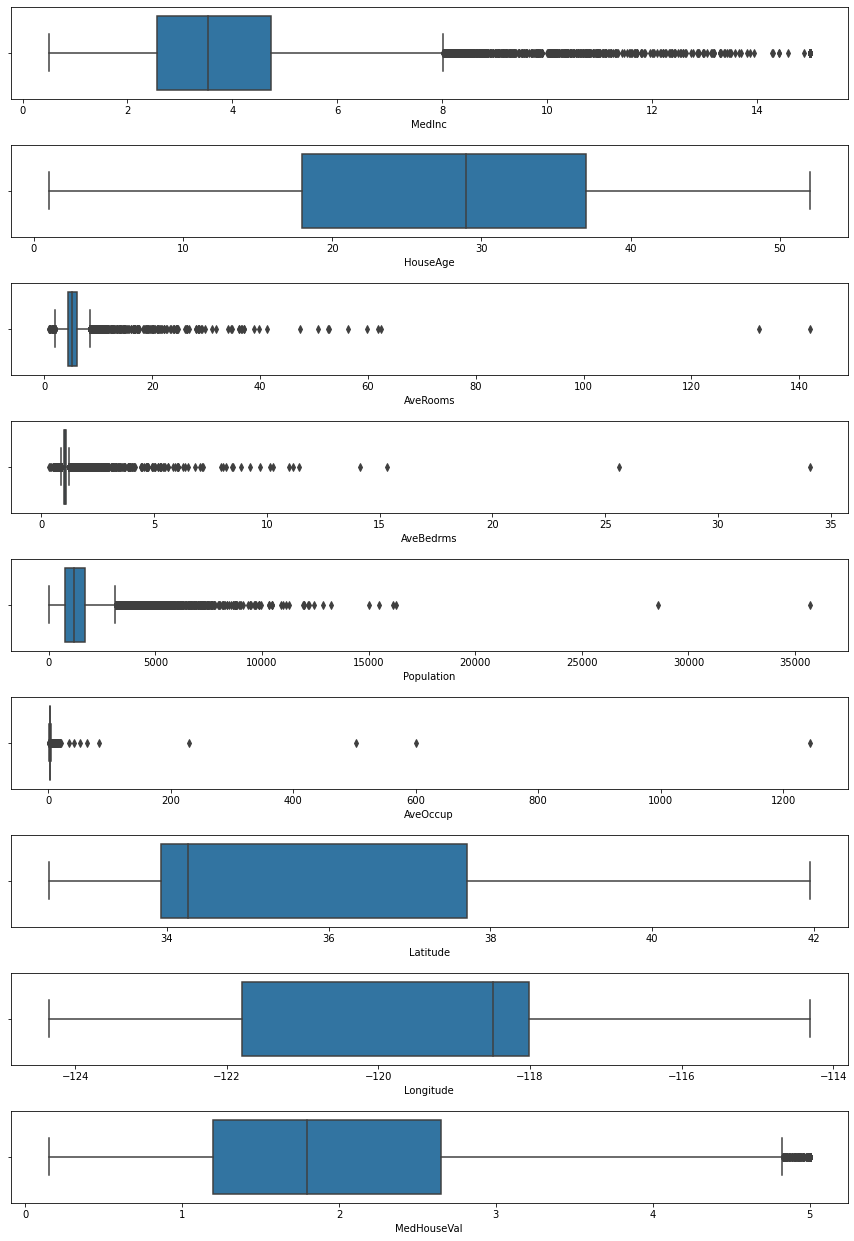

In [60]:
#find_outliers_zscore that takes in a dataset (data) and returns the indices of the outliers 
#(data points that are more than 3 standard deviations away from the mean) using z-score method.
def find_outliers_zscore(data):
    threshold = 3
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    return np.where(np.abs(z_scores) > threshold)

# Loop through each numeric variable and identify any outliers
for column in df12.select_dtypes(include=[np.number]):
    outliers = find_outliers_zscore(df12[column])
    #print(f"{column} has {len(outliers[0])} outliers with z-score > 3: {df[column].iloc[outliers[0]].values}")
    print(f"{column} has {len(outliers[0])} ")


#cols = list(df.columns)
cols = list(i for i in df12)
plt.figure(figsize = (15,22))
plt.subplots_adjust(hspace = 0.5)
for i, col in enumerate(cols, 1):
  plt.subplot(9,1,i)
  #sns.boxplot(x=df[var], ax=axes[i])
  sns.boxplot(df[col])

#Feature engineering

###Data Scaling
If dataset has lots of variances in features then Ml model will not understand relation in the dataset. For this, we need to standerdize the data.

In [61]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
df12['AveRooms'] = mms.fit_transform(df12[['AveRooms']])
df12['AveBedrms'] = mms.fit_transform(df12[['AveBedrms']])
df12['Population'] = mms.fit_transform(df12[['Population']])
df12['AveOccup'] = mms.fit_transform(df12[['AveOccup']])

ss = StandardScaler() # Standardization
df12['MedInc'] = ss.fit_transform(df12[['MedInc']])
df12['HouseAge'] = ss.fit_transform(df12[['HouseAge']])
df12['Latitude'] = ss.fit_transform(df12[['Latitude']])
df12['Longitude'] = ss.fit_transform(df12[['Longitude']])

df12.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.34,0.98,0.04,0.02,0.01,0.00,1.05,-1.33,4.53
1,2.33,-0.61,0.04,0.02,0.07,0.00,1.04,-1.32,3.58
2,1.78,1.86,0.05,0.02,0.01,0.00,1.04,-1.33,3.52
3,0.93,1.86,0.04,0.02,0.02,0.00,1.04,-1.34,3.41
4,-0.01,1.86,0.04,0.02,0.02,0.00,1.04,-1.34,3.42


As per EDA, MedInc, HouseAge, Latitude, Longitude are normally distributed.whereas rest features are log normal and power law distribution.

We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

#Correlation Matrix

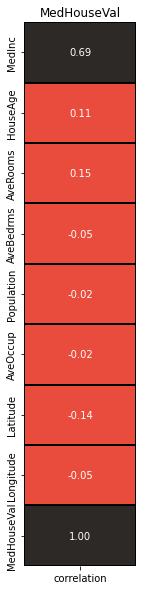

In [62]:
colors12 = ['#E94B3C','#2D2926']
corr = []
for i in range(len(features)):
  corr.append(df[features[i]].corr(df["MedHouseVal"]))

def test(keys, values):
  return dict(zip(keys, values))
dict1 = test(features,corr)

corr_df = pd.DataFrame.from_dict(dict1, orient='index', columns = ['correlation'])

fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (2,10))
plt.subplot(1,1,1)
sns.heatmap(corr_df,annot = True,cmap = colors12,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('MedHouseVal');


#Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [64]:
# numerical_features.pop()
# numerical_features
Numrical_Features1 = [i for i in data.columns]

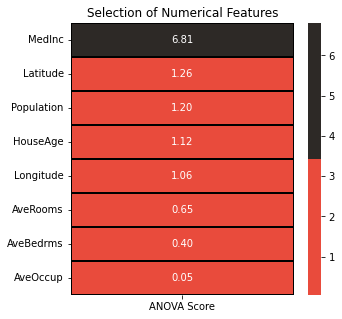

In [65]:
features1 = []
for i in df:
  features1.append(i)

features1 = df12.loc[:,Numrical_Features1]
target = df12.loc[:,'MedHouseVal']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features1,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features1.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors12,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [66]:
df12 = df12.drop(columns = ['AveBedrms'])
df12.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.34,0.98,0.04,0.01,0.00,1.05,-1.33,4.53
1,2.33,-0.61,0.04,0.07,0.00,1.04,-1.32,3.58
2,1.78,1.86,0.05,0.01,0.00,1.04,-1.33,3.52
3,0.93,1.86,0.04,0.02,0.00,1.04,-1.34,3.41
4,-0.01,1.86,0.04,0.02,0.00,1.04,-1.34,3.42


#Modeling 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
#Import necessary libraries 

from sklearn.model_selection import cross_val_score, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression

In [69]:
X = df12.drop(['MedHouseVal'],axis = 1)
y = df12['MedHouseVal']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [71]:
def model_val_scores(mod, X_train, y_train, cv=5):
        
    score_val = []
    standard_deviation = []
        
    scores = cross_val_score(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    rmse_scores = np.sqrt(-scores)
    scores_mean = rmse_scores.mean()
    scores_std = rmse_scores.std()
        
    score_val.append(scores_mean)
    standard_deviation.append(scores_std)
    
    return pd.DataFrame(data=[score_val, standard_deviation], index = ['scores_val', 'scores_std']) 

def performance_metrics(y_test, y_pred):
    
    r2_scores  = []
    mae_value  = []
    mse_value  = []
    rmse_value = []
   
    scores = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    r2_scores.append(scores)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    metrics_dataframe=pd.DataFrame(data= [r2_scores, mae_value, mse_value, rmse_value],
                                index=['r2_score','MAE','MSE','RMSE'])
    return metrics_dataframe.T

#Linear Regression

In [72]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [73]:
model_val_scores(linear_regressor,X_train,y_train)

,0
scores_val,0.74
scores_std,0.01


In [74]:
y_pred = linear_regressor.predict(X_test)
# Model's performance
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.60,0.54,0.53,0.73


#Lasso

In [75]:
lasso = Lasso(alpha= 0.030)
lasso.fit(X_train,y_train)

Lasso(alpha=0.03)

In [76]:
model_val_scores(lasso,X_train,y_train)

,0
scores_val,0.75
scores_std,0.01


In [77]:
y_pred = lasso.predict(X_test)
# Model's performance
performance_metrics(y_test, y_pred)


,r2_score,MAE,MSE,RMSE
0,0.58,0.55,0.56,0.75


#Ridge

In [78]:
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [79]:
model_val_scores(ridge,X_train,y_train)

,0
scores_val,0.74
scores_std,0.01


In [80]:
y_pred = ridge.predict(X_test)
# Model's performance
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.60,0.54,0.53,0.73


#Elastic Net

In [81]:
elastic_model = ElasticNet(alpha = 0.025)
elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.025)

In [82]:
model_val_scores(elastic_model,X_train,y_train)

,0
scores_val,0.74
scores_std,0.01


In [83]:
y_pred = elastic_model.predict(X_test)
# Model's performance
performance_metrics(y_test, y_pred)

,r2_score,MAE,MSE,RMSE
0,0.59,0.55,0.55,0.74


In [84]:
models = [('Linear Regression', linear_regressor),
          ('Lasso', lasso),
          ('Ridge', ridge),
          ('Elastic Net', elastic_model)]

# create an empty dataframe to store the performance metrics
results_df = pd.DataFrame(columns=['Model', 'RMS Score', 'R2 Score'])
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms_score = np.sqrt(np.mean(np.square(y_test - y_pred)))
    r2_score = model.score(X_test, y_test)
    results_df = results_df.append({'Model': name, 'RMS Score': rms_score, 'R2 Score': r2_score}, ignore_index=True)


In [85]:
results_df

,Model,RMS Score,R2 Score
0,Linear Regression,0.73,0.60
1,Lasso,0.75,0.58
2,Ridge,0.73,0.60
3,Elastic Net,0.74,0.59


#Conclusion:
Here you can see that Linear and Ridge Model Performing well.


##Hyperparameter Tunning on Ridge and Lasso Regression

In [86]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.data
X1 = df.values
y1 = california.target

# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Use Lasso regression for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train1, y_train1)

# Print the selected features and their coefficients
print("Lasso selected features:")
lasso_coef = pd.DataFrame(lasso.coef_, index=df.columns, columns=["coef"])
print(lasso_coef[lasso_coef.coef != 0])

# Use Ridge regression for feature selection
ridge = Ridge(alpha=0.1)
ridge.fit(X_train1, y_train1)

# Print the selected features and their coefficients
print("Ridge selected features:")
ridge_coef = pd.DataFrame(ridge.coef_, index=df.columns, columns=["coef"])
print(ridge_coef[ridge_coef.coef != 0])

# Evaluate the model's performance on the test set
y_pred_lasso1 = lasso.predict(X_test1)
r2_lasso = r2_score(y_test1, y_pred_lasso1)
rmse_lasso = mean_squared_error(y_test1, y_pred_lasso1, squared=False)

y_pred_ridge1 = ridge.predict(X_test1)
r2_ridge = r2_score(y_test1, y_pred_ridge1)
rmse_ridge = mean_squared_error(y_test1, y_pred_ridge1, squared=False)


Lasso selected features:
            coef
MedInc      0.39
HouseAge    0.02
Population  0.00
AveOccup   -0.00
Latitude   -0.11
Longitude  -0.10
Ridge selected features:
            coef
MedInc      0.45
HouseAge    0.01
AveRooms   -0.12
AveBedrms   0.78
Population -0.00
AveOccup   -0.00
Latitude   -0.42
Longitude  -0.43


In [90]:
new_df = df.drop(columns=['HouseAge','Population','AveOccup'])
X1 = new_df.values
y1 = california.target
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [91]:
from scipy.stats import uniform

# Create an instance of Lasso and Ridge
lasso = Lasso()
# Use RandomizedSearchCV to search for best hyperparameters for Lasso Regression
lasso_random = RandomizedSearchCV(lasso, param_distributions, n_iter=100, cv=5)
lasso_random.fit(X_train1, y_train1)
print("Best hyperparameters for Lasso Regression:", lasso_random.best_params_)




# Train and evaluate Lasso Regression with best hyperparameters
lasso.set_params(**lasso_random.best_params_)
lasso.fit(X_train1, y_train1)
y_pred1 = lasso.predict(X_test1)
lasso_rms = np.sqrt(mean_squared_error(y_test1, y_pred1))
lasso_r2 = r2_score(y_test1, y_pred1)
print("Lasso Regression RMS Score:", lasso_rms)
print("Lasso Regression R2 Score:", lasso_r2)




Best hyperparameters for Lasso Regression: {'alpha': 0.002}
Lasso Regression RMS Score: 0.7504424402257404
Lasso Regression R2 Score: 0.5702380970802274


In [92]:
new_df1 = df.drop(columns=['Population','AveOccup'])
X2 = new_df1.values
y2 = california.target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [93]:
ridge = Ridge()

# Define the hyperparameters and their possible values to search over
param_distributions = {
    'alpha': [0.002, 0.003, 0.004, 0.005, 0.006, 0.007,1,2,3,4,5]
}
# Train and evaluate Ridge Regression with best hyperparameters
ridge.set_params(**ridge_grid.best_params_)
ridge.fit(X_train2, y_train2)
y_pred2 = ridge.predict(X_test2)
ridge_rms = np.sqrt(mean_squared_error(y_test2, y_pred2))
ridge_r2 = r2_score(y_test2, y_pred2)
print("Ridge Regression RMS Score:", ridge_rms)
print("Ridge Regression R2 Score:", ridge_r2)

# Use GridSearchCV to search for best hyperparameters for Ridge Regression
ridge_grid = GridSearchCV(ridge, param_grid=param_distributions, cv=5)
ridge_grid.fit(X_train1, y_train1)
print("Best hyperparameters for Ridge Regression:", ridge_grid.best_params_)

Ridge Regression RMS Score: 0.7460136073016381
Ridge Regression R2 Score: 0.5752957194888116
Best hyperparameters for Ridge Regression: {'alpha': 5}


###Lasso and Ridge are both are performing well after Hyperparameter tunning.